# Calling various functions in the pre_training_analysis_tools file to display the results here

### References:
References about feature selection, used some, some haven't - dont understand when to use etc, and also jsut dumping some of the tabs i have opened here
https://towardsdatascience.com/feature-selection-techniques-for-classification-and-python-tips-for-their-application-10c0ddd7918b
https://towardsdatascience.com/overview-of-feature-selection-methods-a2d115c7a8f7
https://github.com/jundongl/scikit-feature/blob/master/skfeature/function/similarity_based/lap_score.py


### run the code in sequential order, until the next comment which says to not

In [14]:
# import external modules
import pandas as pd
import numpy as np

from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# import local modules.e
from utils import data_loader, pre_training_analysis_tools


In [15]:
# data - both x and y 
data = data_loader.load_real_dataset()

# getting the x or y component of the data
data_x = data['test_x']
data_y = data['test_y']

In [16]:
# This gets the list of features (not well formatted) after removing the ones that have a 
# variance below the min threshold (by default threshold is 0, can cahnge in the variancethreshold)

from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.0)
print("Original feature shape:", data_x.shape)
new_X = selector.fit_transform(data_x)
print("Transformed feature shape:", new_X.shape)
data_x = data_x.loc[:, selector.get_support()]

print(data_x.columns)



Original feature shape: (52, 260)
Transformed feature shape: (52, 199)
Index(['publicFieldsQty_sum', 'publicFieldsQty_average',
       'publicFieldsQty_stdev', 'publicFieldsQty_median',
       'publicFieldsQty_max', 'totalFieldsQty_sum', 'totalFieldsQty_average',
       'totalFieldsQty_stdev', 'totalFieldsQty_max', 'finalFieldsQty_sum',
       ...
       'comparisonsQty_sum', 'comparisonsQty_average', 'comparisonsQty_stdev',
       'comparisonsQty_median', 'comparisonsQty_max', 'totalMethodsQty_sum',
       'totalMethodsQty_average', 'totalMethodsQty_stdev',
       'totalMethodsQty_median', 'totalMethodsQty_max'],
      dtype='object', length=199)


In [17]:
# since the function below requires both the x and y in a dataframe, this goes through some code to achieve that 
x = data_x
y = data_y
#concat two dataframes for better visualization 
pd.set_option('display.max_rows', None)
matrix = pd.concat([x,y],axis=1)

# calling function to remove highly correlated features - by removing the one that is less
# highly correlated with the target/dependent variable
output_data = pre_training_analysis_tools.remove_collinear_features(matrix, 'maven_reuse', 0.90, 'True')

publicFieldsQty_max | publicFieldsQty_stdev | 0.97
publicFieldsQty_max: -0.064
publicFieldsQty_stdev: -0.055
dropped: publicFieldsQty_max
-----------------------------------------------------------------------------
totalFieldsQty_stdev | totalFieldsQty_sum | 0.93
totalFieldsQty_stdev: -0.042
totalFieldsQty_sum: -0.086
dropped: totalFieldsQty_sum
-----------------------------------------------------------------------------
totalFieldsQty_stdev | totalFieldsQty_average | 0.91
totalFieldsQty_stdev: -0.042
totalFieldsQty_average: -0.049
dropped: totalFieldsQty_average
-----------------------------------------------------------------------------
totalFieldsQty_max | totalFieldsQty_sum | 0.92
totalFieldsQty_max: -0.039
totalFieldsQty_sum: -0.086
dropped: totalFieldsQty_sum
-----------------------------------------------------------------------------
totalFieldsQty_max | totalFieldsQty_stdev | 0.97
totalFieldsQty_max: -0.039
totalFieldsQty_stdev: -0.042
dropped: totalFieldsQty_stdev
--------

privateMethodsQty_sum | finalFieldsQty_sum | 0.94
privateMethodsQty_sum: -0.131
finalFieldsQty_sum: -0.124
dropped: privateMethodsQty_sum
-----------------------------------------------------------------------------
privateMethodsQty_sum | tcc_sum | 0.9
privateMethodsQty_sum: -0.131
tcc_sum: 0.097
dropped: privateMethodsQty_sum
-----------------------------------------------------------------------------
mathOperationsQty_sum | publicFieldsQty_sum | 0.97
mathOperationsQty_sum: -0.137
publicFieldsQty_sum: -0.111
dropped: mathOperationsQty_sum
-----------------------------------------------------------------------------
mathOperationsQty_sum | finalFieldsQty_sum | 0.95
mathOperationsQty_sum: -0.137
finalFieldsQty_sum: -0.124
dropped: mathOperationsQty_sum
-----------------------------------------------------------------------------
mathOperationsQty_sum | wmc_sum | 0.97
mathOperationsQty_sum: -0.137
wmc_sum: -0.123
dropped: mathOperationsQty_sum
------------------------------------------

parenthesizedExpsQty_sum | synchronizedMethodsQty_sum | 0.97
parenthesizedExpsQty_sum: -0.132
synchronizedMethodsQty_sum: -0.113
dropped: parenthesizedExpsQty_sum
-----------------------------------------------------------------------------
parenthesizedExpsQty_sum | assignmentsQty_sum | 0.94
parenthesizedExpsQty_sum: -0.132
assignmentsQty_sum: -0.129
dropped: parenthesizedExpsQty_sum
-----------------------------------------------------------------------------
cbo_sum | publicFieldsQty_sum | 0.94
cbo_sum: -0.116
publicFieldsQty_sum: -0.111
dropped: cbo_sum
-----------------------------------------------------------------------------
cbo_sum | finalFieldsQty_sum | 0.99
cbo_sum: -0.116
finalFieldsQty_sum: -0.124
dropped: finalFieldsQty_sum
-----------------------------------------------------------------------------
cbo_sum | wmc_sum | 0.97
cbo_sum: -0.116
wmc_sum: -0.123
dropped: wmc_sum
-----------------------------------------------------------------------------
cbo_sum | protectedMe

lcom_average | publicMethodsQty_stdev | 0.93
lcom_average: -0.066
publicMethodsQty_stdev: -0.099
dropped: publicMethodsQty_stdev
-----------------------------------------------------------------------------
lcom_stdev | publicMethodsQty_max | 0.93
lcom_stdev: 0.008
publicMethodsQty_max: -0.002
dropped: publicMethodsQty_max
-----------------------------------------------------------------------------
lcom_max | publicMethodsQty_max | 0.93
lcom_max: 0.043
publicMethodsQty_max: -0.002
dropped: publicMethodsQty_max
-----------------------------------------------------------------------------
staticMethodsQty_sum | publicFieldsQty_sum | 0.91
staticMethodsQty_sum: -0.071
publicFieldsQty_sum: -0.111
dropped: publicFieldsQty_sum
-----------------------------------------------------------------------------
staticMethodsQty_sum | synchronizedMethodsQty_sum | 0.91
staticMethodsQty_sum: -0.071
synchronizedMethodsQty_sum: -0.113
dropped: synchronizedMethodsQty_sum
----------------------------------

dit_max | anonymousClassesQty_sum | 0.91
dit_max: -0.039
anonymousClassesQty_sum: -0.043
dropped: anonymousClassesQty_sum
-----------------------------------------------------------------------------
dit_max | synchronizedMethodsQty_sum | 0.9
dit_max: -0.039
synchronizedMethodsQty_sum: -0.113
dropped: synchronizedMethodsQty_sum
-----------------------------------------------------------------------------
dit_max | staticMethodsQty_sum | 0.9
dit_max: -0.039
staticMethodsQty_sum: -0.071
dropped: staticMethodsQty_sum
-----------------------------------------------------------------------------
finalMethodsQty_sum | publicFieldsQty_sum | 0.93
finalMethodsQty_sum: -0.078
publicFieldsQty_sum: -0.111
dropped: publicFieldsQty_sum
-----------------------------------------------------------------------------
finalMethodsQty_sum | finalFieldsQty_sum | 0.9
finalMethodsQty_sum: -0.078
finalFieldsQty_sum: -0.124
dropped: finalFieldsQty_sum
------------------------------------------------------------

loc_median | wmc_median | 0.95
loc_median: -0.108
wmc_median: -0.1
dropped: loc_median
-----------------------------------------------------------------------------
loc_median | assignmentsQty_median | 0.97
loc_median: -0.108
assignmentsQty_median: -0.134
dropped: assignmentsQty_median
-----------------------------------------------------------------------------
nosi_sum | protectedMethodsQty_sum | 0.91
nosi_sum: -0.076
protectedMethodsQty_sum: -0.104
dropped: protectedMethodsQty_sum
-----------------------------------------------------------------------------
nosi_sum | staticMethodsQty_sum | 0.91
nosi_sum: -0.076
staticMethodsQty_sum: -0.071
dropped: nosi_sum
-----------------------------------------------------------------------------
nosi_sum | tryCatchQty_sum | 0.9
nosi_sum: -0.076
tryCatchQty_sum: -0.113
dropped: tryCatchQty_sum
-----------------------------------------------------------------------------
nosi_max | defaultMethodsQty_median | 0.96
nosi_max: 0.031
defaultMethodsQt

variablesQty_median | assignmentsQty_median | 0.98
variablesQty_median: -0.147
assignmentsQty_median: -0.134
dropped: variablesQty_median
-----------------------------------------------------------------------------
variablesQty_median | loc_median | 0.95
variablesQty_median: -0.147
loc_median: -0.108
dropped: variablesQty_median
-----------------------------------------------------------------------------
variablesQty_max | staticFieldsQty_stdev | 0.93
variablesQty_max: -0.055
staticFieldsQty_stdev: -0.075
dropped: staticFieldsQty_stdev
-----------------------------------------------------------------------------
variablesQty_max | staticFieldsQty_max | 0.98
variablesQty_max: -0.055
staticFieldsQty_max: -0.056
dropped: staticFieldsQty_max
-----------------------------------------------------------------------------
variablesQty_max | uniqueWordsQty_max | 0.92
variablesQty_max: -0.055
uniqueWordsQty_max: -0.053
dropped: variablesQty_max
-------------------------------------------------

rfc_sum | dit_sum | 0.99
rfc_sum: -0.127
dit_sum: -0.101
dropped: rfc_sum
-----------------------------------------------------------------------------
rfc_sum | tryCatchQty_sum | 0.92
rfc_sum: -0.127
tryCatchQty_sum: -0.113
dropped: rfc_sum
-----------------------------------------------------------------------------
rfc_sum | loc_sum | 0.98
rfc_sum: -0.127
loc_sum: -0.124
dropped: rfc_sum
-----------------------------------------------------------------------------
rfc_sum | abstractMethodsQty_sum | 0.99
rfc_sum: -0.127
abstractMethodsQty_sum: -0.116
dropped: rfc_sum
-----------------------------------------------------------------------------
rfc_sum | variablesQty_sum | 0.99
rfc_sum: -0.127
variablesQty_sum: -0.128
dropped: variablesQty_sum
-----------------------------------------------------------------------------
rfc_sum | returnQty_sum | 0.98
rfc_sum: -0.127
returnQty_sum: -0.13
dropped: returnQty_sum
----------------------------------------------------------------------------

innerClassesQty_max | innerClassesQty_stdev | 0.93
innerClassesQty_max: 0.043
innerClassesQty_stdev: 0.133
dropped: innerClassesQty_max
-----------------------------------------------------------------------------
comparisonsQty_sum | publicFieldsQty_sum | 0.97
comparisonsQty_sum: -0.134
publicFieldsQty_sum: -0.111
dropped: comparisonsQty_sum
-----------------------------------------------------------------------------
comparisonsQty_sum | finalFieldsQty_sum | 0.94
comparisonsQty_sum: -0.134
finalFieldsQty_sum: -0.124
dropped: comparisonsQty_sum
-----------------------------------------------------------------------------
comparisonsQty_sum | wmc_sum | 0.98
comparisonsQty_sum: -0.134
wmc_sum: -0.123
dropped: comparisonsQty_sum
-----------------------------------------------------------------------------
comparisonsQty_sum | protectedMethodsQty_sum | 0.95
comparisonsQty_sum: -0.134
protectedMethodsQty_sum: -0.104
dropped: comparisonsQty_sum
----------------------------------------------

totalMethodsQty_stdev | publicMethodsQty_stdev | 0.99
totalMethodsQty_stdev: -0.105
publicMethodsQty_stdev: -0.099
dropped: totalMethodsQty_stdev
-----------------------------------------------------------------------------
totalMethodsQty_stdev | lcom_average | 0.93
totalMethodsQty_stdev: -0.105
lcom_average: -0.066
dropped: totalMethodsQty_stdev
-----------------------------------------------------------------------------
totalMethodsQty_stdev | abstractMethodsQty_stdev | 1.0
totalMethodsQty_stdev: -0.105
abstractMethodsQty_stdev: -0.101
dropped: totalMethodsQty_stdev
-----------------------------------------------------------------------------
totalMethodsQty_median | publicMethodsQty_median | 0.91
totalMethodsQty_median: -0.16
publicMethodsQty_median: -0.111
dropped: totalMethodsQty_median
-----------------------------------------------------------------------------
totalMethodsQty_median | abstractMethodsQty_median | 0.98
totalMethodsQty_median: -0.16
abstractMethodsQty_median: -0

In [18]:
# storing the output data into a var
data_x_y = output_data

# getting the x or y component of the data
data_x = output_data
data_y = output_data.pop('maven_reuse')

### Code below should not be run in any order, not dependent on each other. Are all just indepdent feature important visulations 

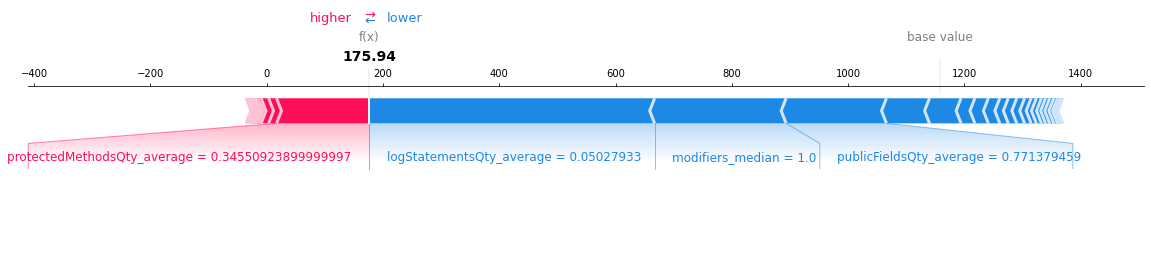

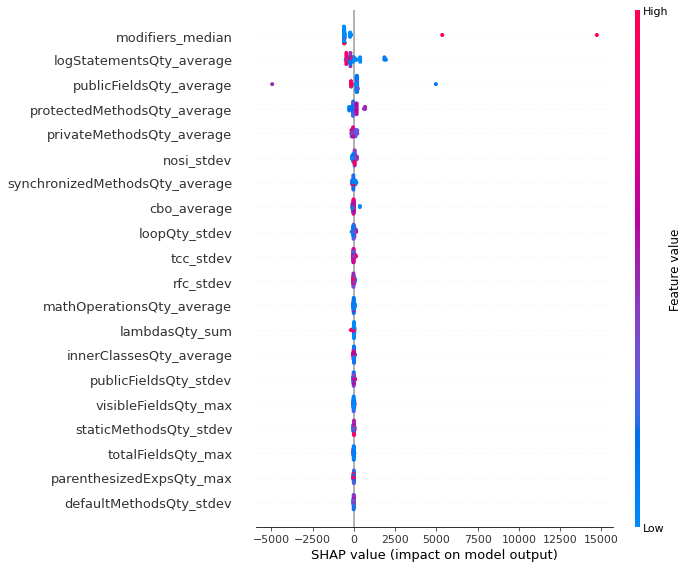

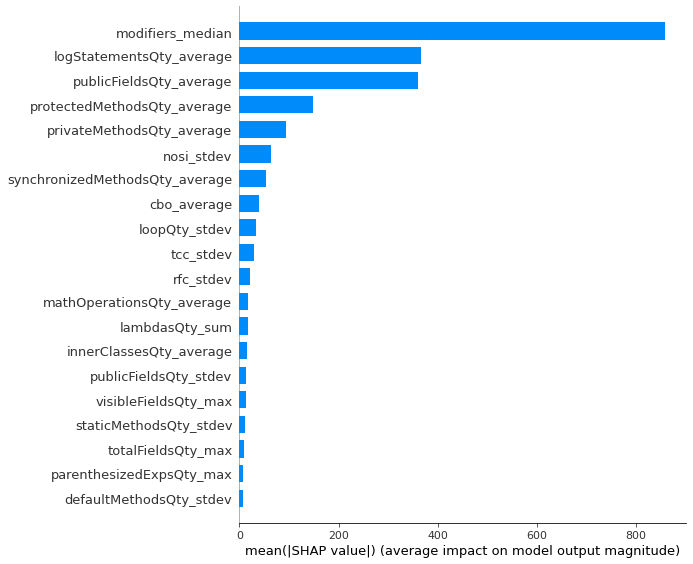

In [22]:
# reference: code is from this github: https://github.com/slundberg/shap
# github code has more visulations ways, explanations and papers the autor wrote and is related too
# idk really understand what is happening either, but it seems cool haha 
# reference: explanation of using this code is from article: https://towardsdatascience.com/feature-selection-techniques-for-classification-and-python-tips-for-their-application-10c0ddd7918b

# Note: according to article above, this algo is specifically good for tree based classifers 
# Comment: the modifers_median was also identified as the most important feature by far when using
# the seleck k best using f-regression property (from scikit learn). idk if that says anything
# Correction on comment: maybe not, just tried and isn't

import xgboost
import shap

# This part - Tree ensemble example with TreeExplainer
# Comment: the shap code set also has agnostic model method - i.e that can use any model 
# other then just tree based 

# load JS visualization code to notebook
shap.initjs()
# train XGBoost model
model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(data_x, label=data_y), 100)
# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(data_x)

# This shows the impacts of the various features has on pushing the average target value - maven reuse out from the
# average 
# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], data_x.iloc[0,:], matplotlib=True)

# visualize the training set predictions - idk how to get this one to work
shap.force_plot(explainer.expected_value, shap_values, data_x)

# summarize the effects of all the features
shap.summary_plot(shap_values, data_x)

# Takes the mean absolute value of the SHAP values for each feature to get a 
# standard bar plot (produces stacked bars for multi-class outputs)
shap.summary_plot(shap_values, data_x, plot_type="bar")


In [7]:
# currently set to use the scikit learn select k best - using f-regression,
# Comment: there are other statistics - anonva, mutal information in the python pre training analysis tools
pre_training_analysis_tools.univariate_selection(data_x, data_y)

                         Feature     Score
67      logStatementsQty_average  0.497017
68        logStatementsQty_stdev  0.425325
69          logStatementsQty_max  0.371508
2             totalFieldsQty_max  0.290751
10   protectedMethodsQty_average  0.284254
34       stringLiteralsQty_stdev  0.273595
49      parenthesizedExpsQty_max  0.269519
55      maxNestedBlocksQty_stdev  0.269096
43  synchronizedMethodsQty_stdev  0.265862
23                     tcc_stdev  0.249711
13         defaultMethodsQty_sum  0.241809
26          uniqueWordsQty_stdev  0.241392
11     protectedMethodsQty_stdev  0.230503
22                   tcc_average  0.229176
44    synchronizedMethodsQty_max  0.228855
99    protectedFieldsQty_average  0.228855
14     defaultMethodsQty_average  0.222993
64          staticMethodsQty_max  0.221279
27     privateMethodsQty_average  0.217003
17         defaultMethodsQty_max  0.211435


In [8]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(data_x, data_y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(data_x)
X_new.shape


Liblinear failed to converge, increase the number of iterations.


(52, 28)

In [ ]:
# reference: https://pandas-profiling.github.io/pandas-profiling/docs/master/index.html
# supposdely works - but takes very long and gets stuck 
# cool tool using pandas profiling - is able to generate a report that includes
# scatter plots, correlation matrixes, identifying highly correlated features, features
# with only unique values, features with zero's etc

import pandas_profiling
from pandas_profiling import ProfileReport
profile = ProfileReport(data_x_y, title="Pandas Profiling Report")

profile.to_widgets()



